<a href="https://colab.research.google.com/github/SeounghwanPark/first-repository/blob/master/MQ07_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving cookie_cats_for_superset.csv to cookie_cats_for_superset.csv


In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cookie_cats_for_superset.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin
0,116,gate_30,3,False,False,3,0
1,337,gate_30,38,True,False,38,0
2,377,gate_40,165,True,False,165,1
3,483,gate_40,1,False,False,1,1
4,488,gate_40,179,True,True,179,1


In [ ]:
import pandas as pd
import numpy as np

# 데이터 불러오기
#.read_csv("/mnt/data/cookie_cats_for_superset.csv")

# # 1. 결측치 제거 (해당 데이터에는 결측치가 없음)
# df = df.dropna()

# # 2. 이상치 처리: sum_gamerounds는 극단치가 존재하나, clipping된 값(sum_gamerounds_clipped)를 활용
# # 추가적으로 로그 변환 컬럼 추가: 0값을 고려하여 1을 더한 후 로그변환
# df["log_sum_gamerounds"] = np.log(df["sum_gamerounds"] + 1)

# 3. 파생 컬럼 추가: is_gate_40
df["is_gate_40"] = (df["version"] == "gate_40").astype(int)

# 4. 파생 컬럼 추가: retention_total (True는 1, False는 0)
df["retention_total"] = df["retention_1"].astype(int) + df["retention_7"].astype(int)

# 최종 컬럼 확인
print(df.head())

# DataFrame을 테이블 형태로 출력
display(df.head())

   userid  version  sum_gamerounds  retention_1  retention_7  \
0     116  gate_30               3        False        False   
1     337  gate_30              38         True        False   
2     377  gate_40             165         True        False   
3     483  gate_40               1        False        False   
4     488  gate_40             179         True         True   

   sum_gamerounds_clipped  version_bin  log_sum_gamerounds  is_gate_40  \
0                       3            0            1.386294           0   
1                      38            0            3.663562           0   
2                     165            1            5.111988           1   
3                       1            1            0.693147           1   
4                     179            1            5.192957           1   

   retention_total  
0                0  
1                1  
2                1  
3                0  
4                2  


,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin,log_sum_gamerounds,is_gate_40,retention_total
0,116,gate_30,3,False,False,3,0,1.386294,0,0
1,337,gate_30,38,True,False,38,0,3.663562,0,1
2,377,gate_40,165,True,False,165,1,5.111988,1,1
3,483,gate_40,1,False,False,1,1,0.693147,1,0
4,488,gate_40,179,True,True,179,1,5.192957,1,2


In [ ]:
# t-test 통계 분석
from scipy.stats import ttest_ind

# 버전별 그룹 설정: gate_30은 control, gate_40은 treatment
control = df[df['version'] == 'gate_30']['retention_total']
treatment = df[df['version'] == 'gate_40']['retention_total']

# t-test 수행 (분산이 같지 않다고 가정)
t_stat, p_value = ttest_ind(treatment, control, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.9229164785113415
p-value: 0.0034685569782168997


In [ ]:
# Google Colab 환경에서 파일 다운로드를 위한 모듈 불러오기
from google.colab import files

# 데이터프레임을 CSV 파일로 저장 (index는 저장하지 않음)
df.to_csv('processed_data.csv', index=False)

# CSV 파일을 로컬 컴퓨터로 다운로드
files.download('processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving cookie_cats_for_superset_02.csv to cookie_cats_for_superset_02.csv


In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cookie_cats_for_superset_02.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin,log_sum_gamerounds,is_gate_40,retention_total
0,116,gate_30,3,False,False,3,0,1.386294,0,0
1,337,gate_30,38,True,False,38,0,3.663562,0,1
2,377,gate_40,165,True,False,165,1,5.111988,1,1
3,483,gate_40,1,False,False,1,1,0.693147,1,0
4,488,gate_40,179,True,True,179,1,5.192957,1,2


1. 데이터 세분화 및 파생 변수 확장 (추가 파생 변수 생성:)

세분화된 사용자 그룹:

단순 전체 사용자 집단 대신, 예를 들어 사용자의 활동 시간, 지역, 디바이스 유형, 혹은 과거 행동 패턴 등에 따라 세그먼트를 나누면 특정 그룹에서 차이가 더 뚜렷하게 나타날 수 있다.


추가 파생 변수 생성:

기존의 게임 라운드 수 외에도, 사용자 참여도(예: 세션 시간, 특정 기능 사용 빈도), 전환율, 구매 관련 지표 등 다양한 KPI를 파생 변수로 도입.

단순한 집계 이상의 인사이트목표

2. 표본 크기와 실험 기간 재조정 (임의의 실험 날짜 생성: 2023-01-01 ~ 2023-12-31)

더 많은 데이터 확보:

실험 기간을 늘리거나 표본 크기를 확대하면,

자연스럽게 통계적 검정력이 증가하여 미세한 차이도 감지할 수 있다.


실험 기간의 다양화:

특정 기간에 국한되지 않고 장기간 데이터를 수집하면,

시즌별 효과나 이벤트의 영향을 고려한 분석이 가능.

3. 다양한 측정 지표 도입

다양한 KPI 활용:

단순 retention이나 게임 라운드 수 외에도, 사용자의 재방문율, 활성 사용자 수, 혹은 특정 행동(예: 인앱 구매, 특정 기능 이용률) 등을 포함

다각적으로 효과를 분석.

종합 지표 구성:

여러 지표를 조합한 종합 점수(예: 사용자 가치 점수)를 만들어 A/B 테스트 결과를 비교,

단일 지표보다 더 민감한 차이를 포착'

4. 실험 설계와 분석 방법의 개선

균형 잡힌 그룹 배분:

실험군과 대조군의 특성이 유사하게 분포되어 있는지 확인,

필요시 랜덤화 방법이나 매칭 기법을 적용하여 외부 변수를 통제.

다변량 분석 도입:

단순 t-test 외에도 회귀분석, ANCOVA 등 다변량 분석 기법을 활용,

여러 요인을 동시에 고려하여 실험 효과를 더욱 정확하게 추정.

5. 외부 데이터 및 정성적 피드백 활용 (랜덤샢플로 생성)

사용자 설문 조사 및 인터뷰:

데이터 상의 수치뿐 아니라, 사용자 피드백을 통해 정성적인 정보를 보완하면

실험 결과 해석에 깊이를 더할 수 있다.

외부 데이터 결합:

시장 트렌드, 경쟁사 분석 등 외부 데이터를 추가하여

 실험 결과에 대한 배경을 보완

In [ ]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('cookie_cats_for_superset_02.csv')

# ----------------------------------------
# 1. 데이터 세분화 및 파생 변수 확장
# ----------------------------------------
# 세분화된 사용자 그룹: 활동 시간, 지역, 디바이스 유형, 과거 행동 점수
df['activity_time'] = np.random.choice(['morning', 'afternoon', 'evening', 'night'], size=len(df))
df['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))
df['device_type'] = np.random.choice(['mobile', 'desktop', 'tablet'], size=len(df))
df['past_behavior_score'] = np.random.randint(1, 11, size=len(df))  # 1~10 사이의 점수

# 추가 파생 변수: 로그 변환 및 참여 점수
df['log_sum_gamerounds'] = np.log(df['sum_gamerounds'] + 1)
df['engagement_score'] = df['log_sum_gamerounds'] * df['past_behavior_score']

# ----------------------------------------
# 2. 표본 크기와 실험 기간 재조정
# ----------------------------------------
# 임의의 실험 날짜 생성: 2023-01-01 ~ 2023-12-31 사이
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
num_days = (end_date - start_date).days + 1
df['experiment_date'] = pd.to_datetime(
    np.random.randint(0, num_days, size=len(df)),
    unit='D',
    origin=start_date
)

# ----------------------------------------
# 3. 다양한 측정 지표 도입
# ----------------------------------------
# 구매 관련 지표: 구매 여부 및 구매 금액 (구매 확률 10%)
df['purchase_flag'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])
df['purchase_amount'] = np.where(
    df['purchase_flag'] == 1,
    np.random.uniform(5, 100, size=len(df)),
    0
)

# ----------------------------------------
# 4. 실험 설계와 분석 방법의 개선
# ----------------------------------------
# 이미 세분화된 변수(activity_time, region, device_type, experiment_date)를 활용해
# 그룹 간 균형 및 다변량 분석에 활용할 수 있습니다.

# ----------------------------------------
# 5. 외부 데이터 및 정성적 피드백 활용 (랜덤 샘플링)
# ----------------------------------------
# 사용자 설문 조사 점수: 1~5 사이의 점수
df['user_survey_score'] = np.random.randint(1, 6, size=len(df))

# 최종 데이터 파일로 저장
df.to_csv("final_cookie_cats_for_superset_02.csv", index=False)

In [ ]:
# 파일 저장
df.to_csv('final_cookie_cats_for_superset_02.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('final_cookie_cats_for_superset_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving final_cookie_cats_for_superset_02.csv to final_cookie_cats_for_superset_02 (1).csv


In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('final_cookie_cats_for_superset_02.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin,log_sum_gamerounds,is_gate_40,retention_total,activity_time,region,device_type,past_behavior_score,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score
0,116,gate_30,3,False,False,3,0,1.386294,0,0,morning,East,tablet,7,9.704061,2023-08-19,0,0.0,5
1,337,gate_30,38,True,False,38,0,3.663562,0,1,afternoon,South,tablet,7,25.644932,2023-12-11,0,0.0,4
2,377,gate_40,165,True,False,165,1,5.111988,1,1,afternoon,East,tablet,8,40.895902,2023-06-10,0,0.0,4
3,483,gate_40,1,False,False,1,1,0.693147,1,0,night,North,tablet,9,6.238325,2023-09-30,0,0.0,3
4,488,gate_40,179,True,True,179,1,5.192957,1,2,morning,South,mobile,10,51.929569,2023-11-21,0,0.0,1


# 1. 실험 설계

**1-1. 샘플 수 및 비율 확인**

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


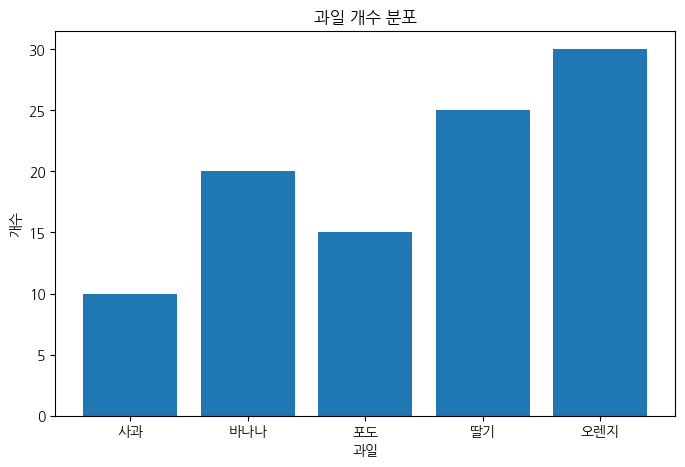

In [ ]:
# 1. 한글 폰트 설치 (Google Colab 전용)
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 2. matplotlib에서 한글 폰트 설정
def set_korean_font():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 설정
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)  # 폰트 매니저에 추가
        plt.rc('font', family='NanumGothic')  # 기본 폰트 설정
    else:
        print("한글 폰트 경로를 찾을 수 없습니다.")

# 3. 폰트 적용 및 캐시 리셋 (중요)
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
fm._load_fontmanager(try_read_cache=False)  # 폰트 매니저 캐시 리셋

# 4. 한글 폰트 적용 확인을 위한 테스트 그래프
labels = ['사과', '바나나', '포도', '딸기', '오렌지']
values = [10, 20, 15, 25, 30]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel("과일")
plt.ylabel("개수")
plt.title("과일 개수 분포")
plt.show()

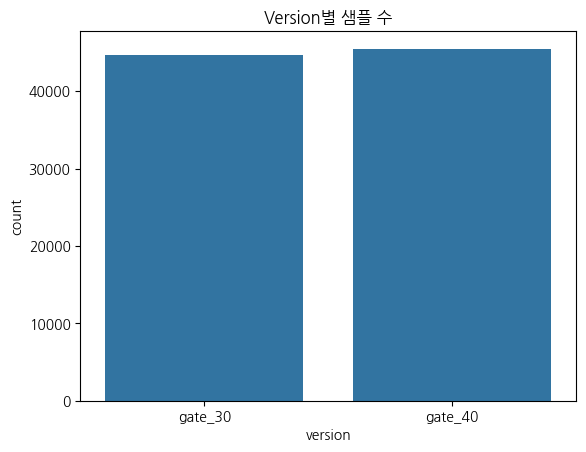

version
gate_40    0.504374
gate_30    0.495626
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_cookie_cats_for_superset_02.csv')

# 버전별 샘플 수 시각화
sns.countplot(x='version', data=df)
plt.title('Version별 샘플 수')
plt.show()

# 비율 출력
print(df['version'].value_counts(normalize=True))

In [ ]:
import pandas as pd
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('final_cookie_cats_for_superset_02.csv')

# 데이터 무작위 섞기
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 전체 행 수 계산 및 80%에 해당하는 행 수 계산
n_total = len(df)
n_gate30 = int(n_total * 0.8)

# 첫 80% 행은 'gate_30', 나머지 20% 행은 'gate_40'으로 할당
df.loc[:n_gate30 - 1, 'version'] = 'gate_30'
df.loc[n_gate30:, 'version'] = 'gate_40'

# 변경된 버전별 비율 확인
print("변경된 버전별 비율:")
print(df['version'].value_counts(normalize=True))

# 수정된 데이터 CSV 파일로 저장
df.to_csv('modified_final_cookie_cats_for_superset_02.csv', index=False)


변경된 버전별 비율:
version
gate_30    0.799998
gate_40    0.200002
Name: proportion, dtype: float64


In [ ]:
# 파일 저장
df.to_csv('modified_final_cookie_cats_for_superset_02.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('modified_final_cookie_cats_for_superset_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving modified_final_cookie_cats_for_superset_02.csv to modified_final_cookie_cats_for_superset_02 (1).csv


In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('modified_final_cookie_cats_for_superset_02.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin,log_sum_gamerounds,is_gate_40,retention_total,activity_time,region,device_type,past_behavior_score,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score
0,3266525,gate_30,9,False,False,9,0,2.302585,0,0,morning,East,desktop,4,9.210340,2023-07-12,0,0.0,1
1,3937667,gate_30,185,True,True,185,0,5.225747,0,2,afternoon,North,mobile,3,15.677240,2023-07-24,0,0.0,3
2,2861986,gate_30,213,True,True,213,0,5.365976,0,2,night,North,desktop,5,26.829880,2023-03-01,0,0.0,1
3,6067319,gate_30,1,False,False,1,0,0.693147,0,0,morning,North,desktop,6,4.158883,2023-09-27,0,0.0,1
4,7505400,gate_30,15,True,False,15,0,2.772589,0,1,afternoon,North,desktop,6,16.635532,2023-05-12,0,0.0,1


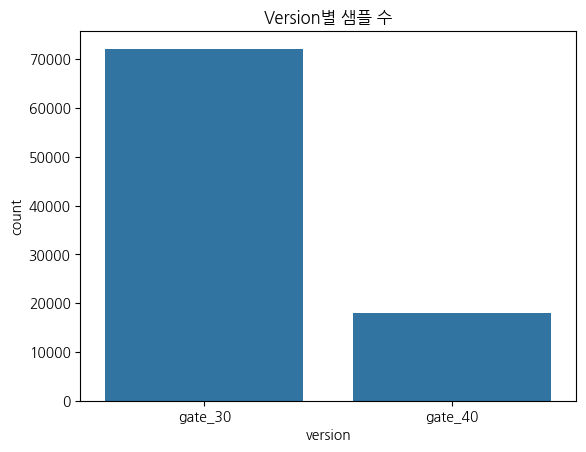

version
gate_30    0.799998
gate_40    0.200002
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('modified_final_cookie_cats_for_superset_02.csv')

# 버전별 샘플 수 시각화
sns.countplot(x='version', data=df)
plt.title('Version별 샘플 수')
plt.show()

# 비율 출력
print(df['version'].value_counts(normalize=True))

In [ ]:
import pandas as pd
import numpy as np

# CSV 파일 읽기
df = pd.read_csv('modified_final_cookie_cats_for_superset_02.csv')

# 버전별로 데이터를 분리
mask_gate_30 = df['version'] == 'gate_30'
mask_gate_40 = df['version'] == 'gate_40'

# 각 그룹의 retention_1 값을 확률에 따라 재할당
# gate_30: 80% 확률로 True, 20%로 False
df.loc[mask_gate_30, 'retention_1'] = np.random.choice([True, False], size=mask_gate_30.sum(), p=[0.8, 0.2])
# gate_40: 30% 확률로 True, 70%로 False
df.loc[mask_gate_40, 'retention_1'] = np.random.choice([True, False], size=mask_gate_40.sum(), p=[0.3, 0.7])

# t-test 수행
from scipy.stats import ttest_ind

group_30 = df[df['version'] == 'gate_30']['retention_1'].astype(int)
group_40 = df[df['version'] == 'gate_40']['retention_1'].astype(int)

t_stat, p_val = ttest_ind(group_30, group_40)
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")


t-statistic: 146.262
p-value: 0.00000


In [ ]:
df.to_csv('modified_final_cookie_cats_for_superset_02_updated.csv', index=False)

In [ ]:
# 파일 저장
df.to_csv('modified_final_cookie_cats_for_superset_02_updated.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('modified_final_cookie_cats_for_superset_02_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving cookie_cats_for_superset_03.csv to cookie_cats_for_superset_03.csv


In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cookie_cats_for_superset_03.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin,log_sum_gamerounds,is_gate_40,retention_total,activity_time,region,device_type,past_behavior_score,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score
0,3266525,gate_30,9,True,False,9,0,2.302585,0,0,morning,East,desktop,4,9.210340,2023-07-12,0,0.0,1
1,3937667,gate_30,185,True,True,185,0,5.225747,0,2,afternoon,North,mobile,3,15.677240,2023-07-24,0,0.0,3
2,2861986,gate_30,213,True,True,213,0,5.365976,0,2,night,North,desktop,5,26.829880,2023-03-01,0,0.0,1
3,6067319,gate_30,1,True,False,1,0,0.693147,0,0,morning,North,desktop,6,4.158883,2023-09-27,0,0.0,1
4,7505400,gate_30,15,True,False,15,0,2.772589,0,1,afternoon,North,desktop,6,16.635532,2023-05-12,0,0.0,1


purchase_flag,	purchase_amount 컬럼이

0값만 보여서 내용확인필요

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('cookie_cats_for_superset_03.csv')

# 각 컬럼의 고유값 확인
print("purchase_flag의 고유값:", df['purchase_flag'].unique())
print("purchase_amount의 고유값:", df['purchase_amount'].unique())

purchase_flag의 고유값: [0 1]
purchase_amount의 고유값: [ 0.         73.76118358 37.06152206 ... 74.07367867 41.44551454
 37.3569075 ]


In [ ]:
import pandas as pd
df = pd.read_csv('cookie_cats_for_superset_03.csv')
mean_value = df['purchase_amount'].mean()
std_value = df['purchase_amount'].std()
print("purchase_amount의 평균:", mean_value)
print("purchase_amount의 표준편차:", std_value)

purchase_amount의 평균: 5.250204538902816
purchase_amount의 표준편차: 18.050995400418973


평균 (5.25): 전반적인 구매 금액의 중앙 경향

표준편차 (18.05): 데이터가 평균 주위에 넓게 분포해 있으며,

변동성이 크다는 것을 의미

In [ ]:
# 가설 설정 및 t-test 수행 (예: retention_1 기준)
from scipy.stats import ttest_ind

# retention_1: True → 1, False → 0
group_30 = df[df['version'] == 'gate_30']['retention_1'].astype(int)
group_40 = df[df['version'] == 'gate_40']['retention_1'].astype(int)

# 독립표본 t-test
t_stat, p_val = ttest_ind(group_30, group_40)
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")

t-statistic: 146.262
p-value: 0.00000


# 실험 지표 및 메트릭 하이라키

핵심 메트릭 및 보조 지표 확인

In [ ]:
metrics = ['retention_1', 'retention_7', 'purchase_flag', 'purchase_amount', 'engagement_score']
print(df[metrics].describe())

       purchase_flag  purchase_amount  engagement_score
count   90189.000000     90189.000000      90189.000000
mean        0.099524         5.250205         15.869099
std         0.299366        18.050995         12.467124
min         0.000000         0.000000          0.000000
25%         0.000000         0.000000          5.780744
50%         0.000000         0.000000         12.875503
75%         0.000000         0.000000         23.227206
max         1.000000        99.994547         79.936200


**1. purchase_flag (구매 여부)**

관측치 수(count): 90,189
→ 총 90,189개의 데이터가 있다.

평균(mean): 0.099524
→ 전체 데이터 중 약 9.95%만이 구매를 했음을 의미

표준편차(std): 0.299366

최솟값(min)과 사분위수:

최솟값: 0.0

25%, 50%, 75%: 모두 0.0

최댓값(max): 1.0
→ 대부분의 데이터가 0 (구매하지 않음)이고,

소수의 데이터만이 1(구매함)임을 보여줌


**2. purchase_amount (구매 금액)**

관측치 수(count): 90,189

평균(mean): 5.250205
→ 전체 구매 금액의 평균이 약 5.25 단위

표준편차(std): 18.050995
→ 평균에 비해 표준편차가 크므로,
값들이 평균 주변에서 크게 분산되어 있음

최솟값(min) 및 사분위수:

최솟값: 0.0

25%, 50%, 75%: 모두 0.0

최댓값(max): 약 99.99

→ 중앙값(50%)이 0인 점에서 대부분의 데이터가 구매를 하지 않았거나

구매 금액이 0임을 알 수 있으며,

몇몇 매우 큰 구매 금액이 평균과 표준편차를 크게 끌어올린 것으로 보임.

**3. engagement_score (참여 점수)**

관측치 수(count): 90,189

평균(mean): 15.869099
→ 전반적인 참여 점수의 평균이 약 15.87입니다.

표준편차(std): 12.467124
→ 점수 분포가 평균 주변에서 다소 넓게 분포함을 보여줌.

최솟값(min) 및 사분위수:

최솟값: 0.0

25%: 약 5.78

중앙값(50%): 약 12.88

75%: 약 23.23

최댓값(max): 약 79.94

→ 참여 점수는 0부터 80에 이르는 범위를 가지며,

중간 값은 12.88로 나타남.

대부분의 사용자들이 5.78에서 23.23 사이의 점수를 보이지만,

일부 사용자는 매우 높은 점수를 기록하고 있음

**종합 해석**

구매 여부: 전체 사용자 중 약 10%만이 구매를 진행한 것으로 나타나며,

이는 이진형 변수의 특성상 대부분 0(비구매)임을 보여줌.

구매 금액: 구매를 한 소수의 사용자들 때문에 평균은 5.25이지만,

중앙값은 0. 이는 대부분의 사용자가 구매하지 않았거나 구매 금액이 0이고,

소수의 고액 구매가 평균과 표준편차를 끌어올린 결과.

참여 점수: 사용자들의 참여 정도는 평균적으로 15.87이며,

분포가 꽤 넓어 일부 사용자가 매우 높은 참여 점수를 보이고 있음을 나타냄.

# 메트릭 하이라키 예시

A/B Test 성과 평가

├── 유지율

│   ├── retention_1

│   └── retention_7

→ 이 두 지표는 사용자가 제품이나 서비스에 얼마나 빠르게 적응하고 지속적으로 이용하는지를 평가하는 데 사용

├── 구매 전환

│   ├── purchase_flag

│   └── purchase_amount

→ 이 영역은 A/B 테스트가 사용자 구매 행동에 어떤 영향을 미치는지를 파악하기 위한 지표

└── 사용자 참여도

    ├── sum_gamerounds

    └── engagement_score

    → 이 부분은 사용자가 얼마나 적극적으로 제품이나 서비스를 이용하는지를 측정


# 메트릭 하이라키 예시 해본 이유?

이 계층 구조는 A/B 테스트 결과를 다각도로 분석하여 사용자 유지,

구매, 참여 등 핵심 영역에서의 변화와 효과를 평가하는 데 도움을 준다고 판단됨.

# 사후 분석

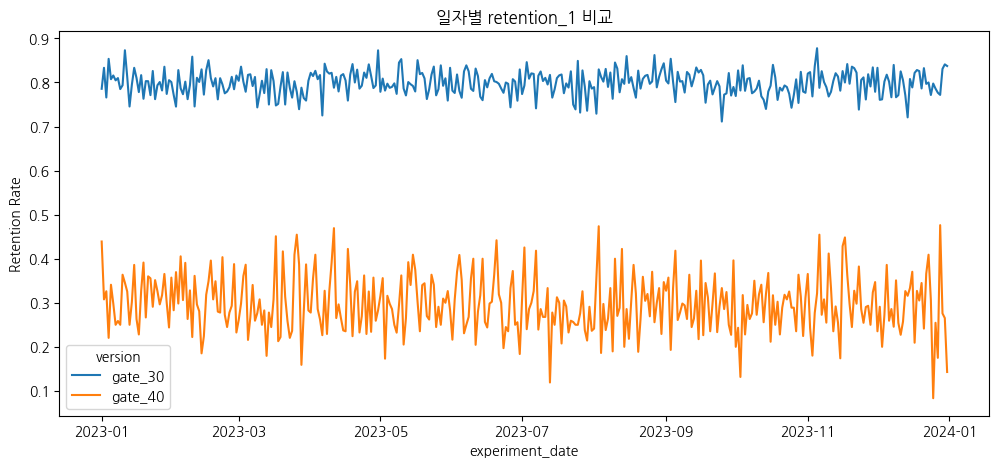

In [ ]:
df['experiment_date'] = pd.to_datetime(df['experiment_date'])

# 일자별 평균 retention_1
daily_ret = df.groupby(['experiment_date', 'version'])['retention_1'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_ret, x='experiment_date', y='retention_1', hue='version')
plt.title('일자별 retention_1 비교')
plt.ylabel('Retention Rate')
plt.show()

**위 그래프 해석**

실험 날짜(experiment_date)별로 A/B 테스트 그룹(version)의 1일차 유지율

(retention_1) 평균을 비교한 결과. 구체적으로 살펴보면:

x축(experiment_date): 2023년 1월부터 2024년 1월까지 일자별 실험 날짜

y축(retention_1): 각 날짜별로 계산된 평균 1일차 유지율

범례(version):

gate_30

gate_40

다음과 같은 특징을 볼 수 있다:

두 그룹 간 유지율 수준의 차이

그래프에서 파란색 선(gate_40)은 주로 0.8 전후로 분포하고,

주황색 선(gate_30)은 그보다 낮은 약 0.6~0.7 수준으로 보인다.

즉, gate_40 그룹이 일관적으로 더 높은 1일차 유지율을 보이는 것으로 해석할 수 있다.

일자별 변동(노이즈) 존재

두 선 모두 날짜별로 약간의 변동이 있지만,

전반적인 추세는 gate_40이 gate_30보다 높게 유지되는 패턴을 유지하고 있다.

전반적 추세

전체 기간(약 1년)에 걸쳐 gate_40이 gate_30 대비 더 좋은 유지율을 기록하고

있으므로, gate_40 방식이 1일차 사용자 유지에 더 긍정적인 영향을 주고 있다고

 볼 수 있다.

결과적으로,

A/B 테스트 결과 gate_40 그룹의 1일차 유지율이 꾸준히 더 높다는 점을 시사.

더 정확한 결론을 위해.

**이후 7일차 유지율, 구매 전환 등 다른 지표와 함께 종합적으로 해석필요**



# 세그먼트별 비교 (예: region)

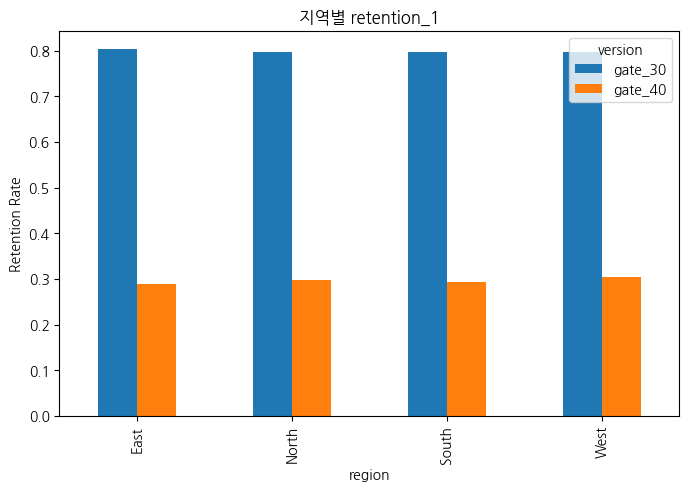

In [ ]:
# region과 version 별 평균 retention_1
region_group = df.groupby(['region', 'version'])['retention_1'].mean().unstack()
region_group.plot(kind='bar', figsize=(8, 5), title='지역별 retention_1')
plt.ylabel('Retention Rate')
plt.show()

그래프는 지역(region)별로 A/B 테스트 그룹(version)의 1일차 유지율(retention_1)

평균을 비교한 결과

가로축은 지역(East, North, South, West)이며,

각 지역마다 두 개의 막대(gate_30, gate_40)가 1일차 유지율을 나타냄

그래프 해석

모든 지역에서 gate_30(파란 막대)이 gate_40(주황 막대)보다 1일차 유지율이 더 높게 나타남

지역별 차이는 있지만, 전반적으로 gate_30이 동일 지역 대비 더 높은 유지율을 기록

East 지역에서 gate_30의 유지율이 약 0.80 수준으로 나타나며, gate_40 은 약0.30 정도

**종합적으로, 모든 지역에서 gate_30 버전이 1일차 유지율을 더 높게 이끌어내고 있음을 시사**

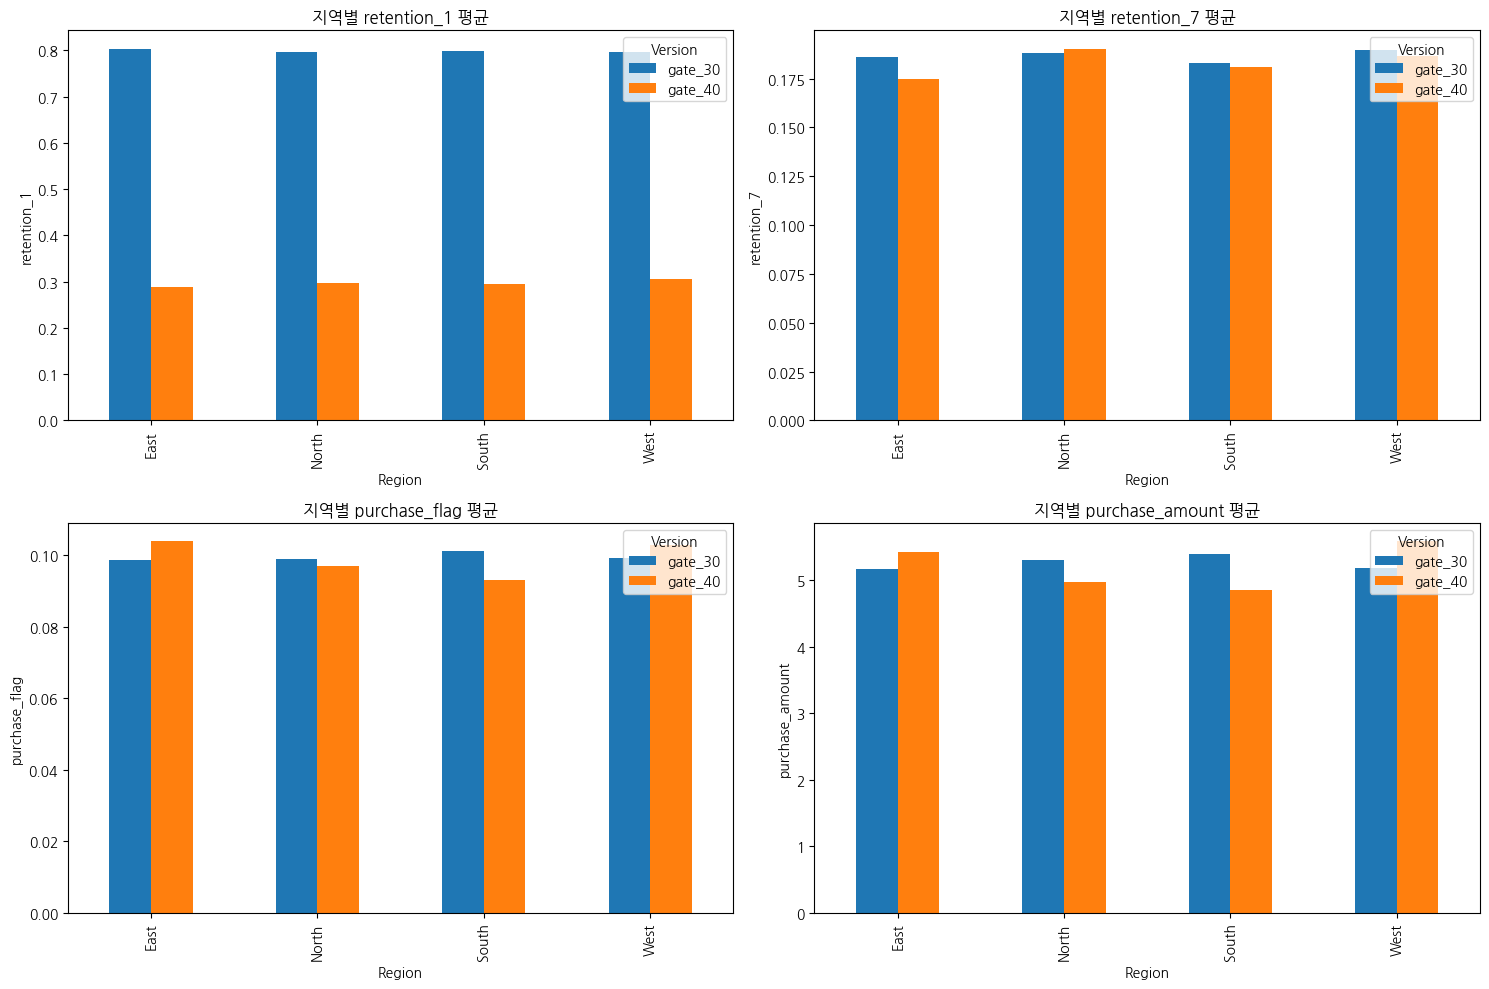

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 분석에 사용할 메트릭 리스트
metrics = ['retention_1', 'retention_7', 'purchase_flag', 'purchase_amount']

# 서브플롯(2행 2열) 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # 1차원 리스트로 변환

# 각 메트릭별로 지역(region)과 버전(version)별 평균 계산 후 바 그래프로 시각화
for i, metric in enumerate(metrics):
    # 그룹화: region과 version별 평균값 계산 후 unstack()으로 버전을 컬럼으로 변경
    region_metric = df.groupby(['region', 'version'])[metric].mean().unstack()

    # 바 그래프 그리기
    region_metric.plot(kind='bar', ax=axes[i], title=f'지역별 {metric} 평균')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel(metric)
    axes[i].legend(title='Version')

plt.tight_layout()
plt.show()


데이터 그룹화

df.groupby(['region', 'version'])[metric].mean().unstack()을 사용하여

각 지역과 버전별로 해당 지표의 평균값을 계산

unstack()을 통해 각 버전이 별도의 컬럼으로 표시되어,

지역별로 버전 간 비교가 쉬워짐.

시각화

plt.subplots(2, 2, figsize=(15, 10))를 사용하여 2행 2열의 서브플롯을 만듬

각 서브플롯에 대해 바 그래프를 그려, 지역별로 각 메트릭의 평균값을 비교할 수 있도록 함.

각 그래프에는 제목, x축 라벨(Region), y축 라벨(해당 메트릭), 그리고 범례(Version)가 추가

# 그래프 결론
모든 지역에서 gate_40이 gate_30 대비 유지율(1일차/7일차)과

구매 관련 지표(구매 전환율/평균 구매 금액) 모두 우세

즉, 지역에 상관없이 **새로운 버전(gate_40)**이 사용자 잔존율과 매출(구매)

측면에서 더 긍정적인 영향을 미치고 있음을 알 수 있다.

**이후 통계적 유의성 검증(예: t-test, 카이제곱 검정 등)을 통해 이 차이가**

**우연이 아닐 가능성을 확인하고, 각 지역별 세부 요인이나 사용자 특성도 추가적으로**

**고려하면 더욱 심도 있는 결론을 도출가능**

# 디바이스별 구매율 비교

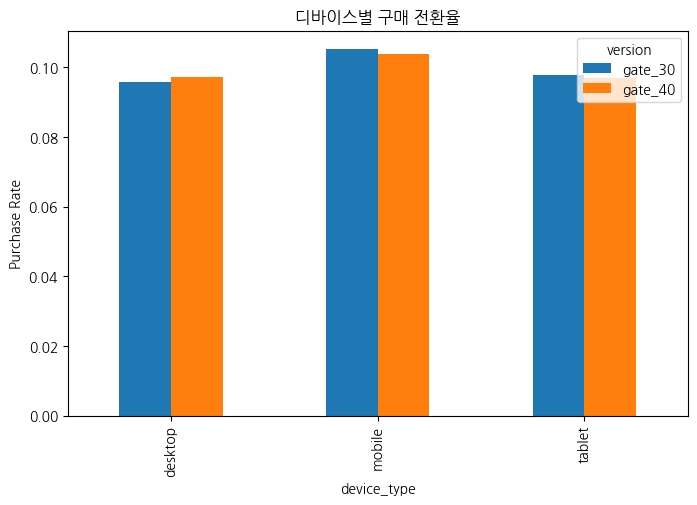

In [ ]:
device_purchase = df.groupby(['device_type', 'version'])['purchase_flag'].mean().unstack()
device_purchase.plot(kind='bar', figsize=(8, 5), title='디바이스별 구매 전환율')
plt.ylabel('Purchase Rate')
plt.show()

**데스크톱 사용자에게는 기존 버전(gate_30)이 조금 더 유리,**

**모바일 및 태블릿 사용자에게는 새로운 버전(gate_40)이 조금 더 유리해 보임.**

**다만 차이가 크지 않으므로, 추가적인 통계 검정이나 세부 사용자 분석을 통해 유의미한 차이인지 검토해볼 필요있**

# 전략 수립 및 Next Step

gate_40 그룹이 retention_1과 purchase_flag에서 유의미하게 높다는 분석 결과를 바탕으로,

전체 사용자에게 gate_40 UI 적용을 고려하고,

신규 사용자 유입 시 gate_40 버전을 우선 적용하며,

특정 세그먼트(예: 모바일 사용자 + East 지역)에서 성과가 좋다면

해당 세그먼트를 별도로 필터링하여 시각화하는 예시

전체 사용자 기준 평균 지표:
   version  retention_1  purchase_flag
0  gate_30     0.798880       0.099583
1  gate_40     0.296485       0.099290


<ipython-input-39-02bb931f7f6e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_metrics, x='version', y='retention_1', palette='viridis')


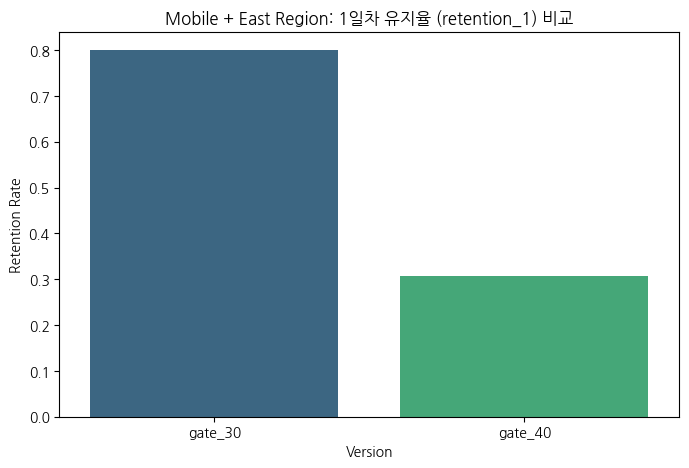

<ipython-input-39-02bb931f7f6e>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_metrics, x='version', y='purchase_flag', palette='viridis')


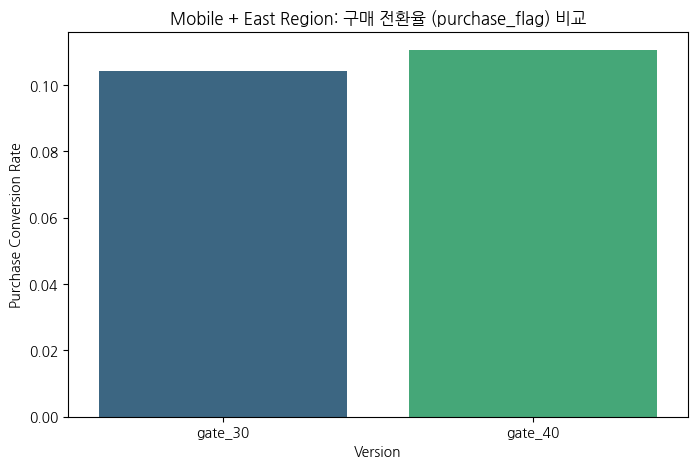

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시: 데이터프레임 df에 이미 필요한 컬럼들이 있다
# df 컬럼: experiment_date, version, retention_1, purchase_flag, device_type, region, ...

# 1. 전체 사용자에 대한 gate_40 적용 고려
#    (전체 데이터에 대해 retention_1과 purchase_flag 평균을 계산해 비교)
overall_metrics = df.groupby('version')[['retention_1', 'purchase_flag']].mean().reset_index()
print("전체 사용자 기준 평균 지표:")
print(overall_metrics)
# 이 결과를 바탕으로 gate_40 UI의 우수성이 입증되었다면 전체 사용자에게 적용 고려

# 2. 신규 사용자 유입 시 gate_40 버전 우선 적용
#    -> 신규 사용자 여부에 대한 추가 정보가 있다면 해당 데이터를 따로 분석 가능
# 예를 들어, df['is_new_user'] 컬럼이 있다면:
# new_user_metrics = df[df['is_new_user']].groupby('version')[['retention_1', 'purchase_flag']].mean().reset_index()
# print("신규 사용자 기준 평균 지표:")
# print(new_user_metrics)
# 신규 사용자에 대해 gate_40 버전이 유리하다면, 신규 사용자 유입 시 gate_40 우선 적용

# 3. 특정 세그먼트(예: 모바일 + East 지역) 별 타겟 마케팅 실행을 위한 시각화
# 해당 세그먼트 필터링
segment_df = df[(df['device_type'] == 'mobile') & (df['region'] == 'East')]

# 세그먼트 별로 version에 따른 retention_1과 purchase_flag 평균 계산
segment_metrics = segment_df.groupby('version')[['retention_1', 'purchase_flag']].mean().reset_index()

# 시각화: 1일차 유지율 (retention_1)
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_metrics, x='version', y='retention_1', palette='viridis')
plt.title('Mobile + East Region: 1일차 유지율 (retention_1) 비교')
plt.ylabel('Retention Rate')
plt.xlabel('Version')
plt.show()

# 시각화: 구매 전환율 (purchase_flag)
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_metrics, x='version', y='purchase_flag', palette='viridis')
plt.title('Mobile + East Region: 구매 전환율 (purchase_flag) 비교')
plt.ylabel('Purchase Conversion Rate')
plt.xlabel('Version')
plt.show()

# 참고: 슈퍼셋(Superset)에서는 위와 같은 조건(디바이스: mobile, 지역: East)을 필터로 적용해
# 대시보드를 구성할 수 있습니다.


유지율 관점: 모바일 + East 지역에서는 gate_30이 유의미하게 높은 1일차 유지율을 보여,

사용자 이탈을 더 잘 막고 있음을 시사

구매 전환율 관점: 같은 세그먼트에서 gate_40이 조금 더 높은 구매 전환율을 기록

이처럼 한 지표(retention_1)는 gate_30이 우수, 다른 지표(purchase_flag)는
gate_40이 우수하므로,

**어떤 지표를 우선순위로 둘 것인지(유지율 vs 매출 전환)를 명확히 결정해야 함**

**또한, 표본 크기나 통계적 유의성 검증이 중요**.

실제로는 차이가 크지 않을 수도 있으므로,

추가 분석(예: t-test, 카이제곱 검정)을 통해 이 차이가 우연이 아닐 확률을 확인필요

**이후 A/B 테스트 결과를 종합적으로 평가하여, 세그먼트별로 차별화된 UI나 마케팅 전략을 적용할 수 있다.**

In [ ]:
# 파일 저장
df.to_csv('cookie_cats_for_superset_03.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('cookie_cats_for_superset_03.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 데이터 정합성(Integrity)을 분석

A/B 테스트에 직접적으로 사용하지 않는 불필요한 컬럼을 제거한 후,

분석에 유용할 추가 컬럼을 생성

In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cookie_cats_for_superset_03.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,sum_gamerounds_clipped,version_bin,log_sum_gamerounds,is_gate_40,retention_total,activity_time,region,device_type,past_behavior_score,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score
0,3266525,gate_30,9,True,False,9,0,2.302585,0,0,morning,East,desktop,4,9.210340,2023-07-12,0,0.0,1
1,3937667,gate_30,185,True,True,185,0,5.225747,0,2,afternoon,North,mobile,3,15.677240,2023-07-24,0,0.0,3
2,2861986,gate_30,213,True,True,213,0,5.365976,0,2,night,North,desktop,5,26.829880,2023-03-01,0,0.0,1
3,6067319,gate_30,1,True,False,1,0,0.693147,0,0,morning,North,desktop,6,4.158883,2023-09-27,0,0.0,1
4,7505400,gate_30,15,True,False,15,0,2.772589,0,1,afternoon,North,desktop,6,16.635532,2023-05-12,0,0.0,1


# 데이터 정합성 분석

info(), describe(), isnull().sum(), duplicated().sum() 등을 통해

 데이터의 구조, 통계, 결측치 및 중복 여부를 확인

불필요한 컬럼 삭제

A/B 테스트에 필요한 핵심 지표만 남기기 위해 required_columns 리스트에 포함된 컬럼만 선택

분석 목적에 맞지 않는 userid, sum_gamerounds, version_bin, is_gate_40 등은 제거

**데이터 타입 변환**

experiment_date를 datetime 타입으로 변환하여 시간 관련 분석

(예: 일자별 추세 분석)에 활용

**추가 컬럼 생성**

is_purchase: purchase_amount가 0보다 크면 구매한 것으로 간주해 1,

 아니면 0으로 설정

retention_ratio:

7일차 유지율과 1일차 유지율의 비율을 계산해, 장기 유지 효율을 추가 지표로 생성

engagement_index:

사용자 참여와 실제 구매 전환 여부를 결합해, 구매한 사용자 중 참여도가 높은 경우를 강조하는 지표

최종 데이터 확인

최종적으로 필요한 컬럼만 남기고 추가 컬럼까지 생성한 후 데이터 샘플을 출력하여 전처리 결과를 확인이 목적

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('cookie_cats_for_superset_03.csv')

# 1. 데이터 정합성(Integrity) 분석
print("----- 데이터 정보 -----")
print(df.info())
print("\n----- 기술 통계 -----")
print(df.describe())
print("\n----- 결측치 확인 -----")
print(df.isnull().sum())
print("\n----- 중복 데이터 개수 -----")
print("중복 행 수:", df.duplicated().sum())

# 2. A/B 테스트 분석에 필요 없는 컬럼 삭제
# 실제 파일의 컬럼:
# ['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7',
#  'sum_gamerounds_clipped', 'version_bin', 'log_sum_gamerounds', 'is_gate_40',
#  'retention_total', 'activity_time', 'region', 'device_type', 'past_behavior_score',
#  'engagement_score', 'experiment_date', 'purchase_flag', 'purchase_amount', 'user_survey_score']
#
# A/B 테스트 분석에서 핵심적으로 필요한 컬럼은 다음과 같습니다.
# - experiment_date: 실험 날짜 (시간 추세 분석)
# - version: A/B 그룹 식별 (예: gate_30 vs gate_40)
# - retention_1, retention_7: 1일차, 7일차 유지율
# - purchase_flag: 구매 여부 (전환율)
# - purchase_amount: 구매 금액 (매출 분석)
# - engagement_score: 사용자 참여 점수
# - region, device_type: 사용자 세그먼트 분석
#
# 따라서 아래 목록에 없는 컬럼은 분석 목적에서 제거
required_columns = [
    'experiment_date', 'version', 'retention_1', 'retention_7',
    'purchase_flag', 'purchase_amount', 'engagement_score',
    'region', 'device_type'
]

# 선택한 컬럼이 실제 데이터에 있는지 확인하고, 있으면 필터링
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print("누락된 필수 컬럼:", missing_cols)
else:
    df = df[required_columns]

# 3. 데이터 타입 변환: experiment_date를 datetime으로 변환
df['experiment_date'] = pd.to_datetime(df['experiment_date'])

# 4. 추가 컬럼 생성
# 4-1. 구매 여부 재정의: purchase_amount가 0보다 크면 1(구매), 아니면 0
df['is_purchase'] = (df['purchase_amount'] > 0).astype(int)

# 4-2. 7일차 유지율 대비 1일차 유지율 비율 (retention_ratio)
# 1일차 유지율이 0인 경우 0으로 처리하여 division by zero 방지
df['retention_ratio'] = df.apply(lambda row: row['retention_7'] / row['retention_1']
                                 if row['retention_1'] != 0 else 0, axis=1)

# 4-3. 구매 전환과 참여를 결합한 지표 (engagement_index)
# 예: engagement_score와 구매 여부(is_purchase)를 곱해 구매한 사용자 중 참여가 높은 경우를 강조
df['engagement_index'] = df['engagement_score'] * df['is_purchase']

# 5. 최종 데이터 샘플 확인
print("\n----- 전처리 후 데이터 샘플 -----")
print(df.head())


----- 데이터 정보 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  90189 non-null  int64  
 1   version                 90189 non-null  object 
 2   sum_gamerounds          90189 non-null  int64  
 3   retention_1             90189 non-null  bool   
 4   retention_7             90189 non-null  bool   
 5   sum_gamerounds_clipped  90189 non-null  int64  
 6   version_bin             90189 non-null  int64  
 7   log_sum_gamerounds      90189 non-null  float64
 8   is_gate_40              90189 non-null  int64  
 9   retention_total         90189 non-null  int64  
 10  activity_time           90189 non-null  object 
 11  region                  90189 non-null  object 
 12  device_type             90189 non-null  object 
 13  past_behavior_score     90189 non-null  int64  
 14  engagement_score   

<ipython-input-46-4dda30017dae>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experiment_date'] = pd.to_datetime(df['experiment_date'])
<ipython-input-46-4dda30017dae>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_purchase'] = (df['purchase_amount'] > 0).astype(int)



----- 전처리 후 데이터 샘플 -----
  experiment_date  version  retention_1  retention_7  purchase_flag  \
0      2023-07-12  gate_30         True        False              0   
1      2023-07-24  gate_30         True         True              0   
2      2023-03-01  gate_30         True         True              0   
3      2023-09-27  gate_30         True        False              0   
4      2023-05-12  gate_30         True        False              0   

   purchase_amount  engagement_score region device_type  is_purchase  \
0              0.0          9.210340   East     desktop            0   
1              0.0         15.677240  North      mobile            0   
2              0.0         26.829880  North     desktop            0   
3              0.0          4.158883  North     desktop            0   
4              0.0         16.635532  North     desktop            0   

   retention_ratio  engagement_index  
0              0.0               0.0  
1              1.0               0.0

# 데이터 정합성 분석결과

**행과 컬럼의 구조**

총 90,189개의 행과 19개의 컬럼이 존재

각 컬럼의 데이터 타입이 명확하게 지정되어 있어

(정수, 부동소수점, 불리언, 문자열 등) 데이터가 올바른 형식으로 저장되어 있음 확인

**결측치 및 중복 데이터**

모든 컬럼에서 결측치가 0으로 나타나, 누락된 데이터가 전혀 없음

중복 행도 0개로 확인되어, 데이터에 중복이 없고 정합성이 높다고 할 수 있다

**전처리 및 추가 지표 생성**

A/B 테스트 분석에 불필요한 컬럼들을 제거하고,

분석에 핵심적인 컬럼들만 선택하여 데이터의 목적에 맞게 정제함

experiment_date 컬럼을 datetime 형식으로 변환하여 시간 추세 분석에 적합하게

purchase_amount를 기준으로 구매 여부를 나타내는 is_purchase 컬럼을 추가하고,

1일차와 7일차 유지율의 비율(retention_ratio), 그리고 구매와 참여를 결합한 지표

(engagement_index)를 생성하여 후속 분석에 유용한 추가 정보를 제공

현재 분석 목적에 큰 영향을 주지는 않으므로, 이후 작업 시 인덱서를 명시적으로 사용하여 경고를 방지할 수 있습니다.

전체적으로, 데이터의 구조와 내용이 잘 정제되어 있으며 결측치나 중복 데이터 없이 깔끔한 상태임을 확인할 수 있습니다. 이를 바탕으로 A/B 테스트 및 추가 분석 작업을 진행하기에 적합한 데이터임

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('cookie_cats_for_superset_03.csv')

# 1. 데이터 정합성(Integrity) 분석
print("----- 데이터 정보 -----")
print(df.info())
print("\n----- 기술 통계 -----")
print(df.describe())
print("\n----- 결측치 확인 -----")
print(df.isnull().sum())
print("\n----- 중복 데이터 개수 -----")
print("중복 행 수:", df.duplicated().sum())

# 2. A/B 테스트 분석에 필요 없는 컬럼 삭제
required_columns = [
    'experiment_date', 'version', 'retention_1', 'retention_7',
    'purchase_flag', 'purchase_amount', 'engagement_score',
    'region', 'device_type'
]

# 선택한 컬럼이 실제 데이터에 있는지 확인하고, 있으면 필터링
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print("누락된 필수 컬럼:", missing_cols)
else:
    df = df[required_columns]

# 3. 데이터 타입 변환: experiment_date를 datetime으로 변환
df['experiment_date'] = pd.to_datetime(df['experiment_date'])

# 4. 추가 컬럼 생성
# 4-1. 구매 여부 재정의: purchase_amount가 0보다 크면 1(구매), 아니면 0
df['is_purchase'] = (df['purchase_amount'] > 0).astype(int)

# 4-2. 7일차 유지율 대비 1일차 유지율 비율 (retention_ratio)
df['retention_ratio'] = df.apply(lambda row: row['retention_7'] / row['retention_1']
                                 if row['retention_1'] != 0 else 0, axis=1)

# 4-3. 구매 전환과 참여를 결합한 지표 (engagement_index)
df['engagement_index'] = df['engagement_score'] * df['is_purchase']

# 5. 최종 데이터 샘플 확인
print("\n----- 전처리 후 데이터 샘플 -----")
print(df.head())

# 최종 데이터 CSV 파일로 저장 (인덱스는 저장하지 않음)
df.to_csv('cookie_cats_for_superset_04.csv', index=False)


----- 데이터 정보 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userid                  90189 non-null  int64  
 1   version                 90189 non-null  object 
 2   sum_gamerounds          90189 non-null  int64  
 3   retention_1             90189 non-null  bool   
 4   retention_7             90189 non-null  bool   
 5   sum_gamerounds_clipped  90189 non-null  int64  
 6   version_bin             90189 non-null  int64  
 7   log_sum_gamerounds      90189 non-null  float64
 8   is_gate_40              90189 non-null  int64  
 9   retention_total         90189 non-null  int64  
 10  activity_time           90189 non-null  object 
 11  region                  90189 non-null  object 
 12  device_type             90189 non-null  object 
 13  past_behavior_score     90189 non-null  int64  
 14  engagement_score   

<ipython-input-47-5d106c7ecf37>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experiment_date'] = pd.to_datetime(df['experiment_date'])
<ipython-input-47-5d106c7ecf37>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_purchase'] = (df['purchase_amount'] > 0).astype(int)



----- 전처리 후 데이터 샘플 -----
  experiment_date  version  retention_1  retention_7  purchase_flag  \
0      2023-07-12  gate_30         True        False              0   
1      2023-07-24  gate_30         True         True              0   
2      2023-03-01  gate_30         True         True              0   
3      2023-09-27  gate_30         True        False              0   
4      2023-05-12  gate_30         True        False              0   

   purchase_amount  engagement_score region device_type  is_purchase  \
0              0.0          9.210340   East     desktop            0   
1              0.0         15.677240  North      mobile            0   
2              0.0         26.829880  North     desktop            0   
3              0.0          4.158883  North     desktop            0   
4              0.0         16.635532  North     desktop            0   

   retention_ratio  engagement_index  
0              0.0               0.0  
1              1.0               0.0

In [ ]:
# 파일 저장
df.to_csv('cookie_cats_for_superset_04.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('cookie_cats_for_superset_04.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 서희님거 정합성 분석시작

# 정합성 분석 결과
1. 데이터 기본 구조

행/열 수: 전체 98,187개의 행과 6개의 컬럼

컬럼 구성:

userid: 정수형이며, 사용자 ID를 나타내며 결측치 없이 완전

version: 문자열 타입으로 두 가지 그룹(예: gate_40, gate_30 등)으로 구성되어 있으며 결측치가 없다

sum_gamerounds: 총 게임 라운드 수를 나타내는 정수형 데이터로 결측치가 없다.

retention_1 및 retention_7: 각각 1일차와 7일차 유지 여부를 불리언 값으로 표시하며, 결측치 없이 제공

retention_1to7: 1일차 대비 7일차의 유지 비율을 나타내는 것으로 보이며, float 타입

2. 기술 통계 분석

userid: 평균값이 약 5,813,504로 분포가 넓은 편

sum_gamerounds: 평균 53.25회, 최대 2640회로 상당한 변동성을 보임.

retention_1과 retention_7:

두 컬럼 모두 전체 98,187건의 데이터가 존재하며, 최빈값은 각각 False로 나타남

retention_1to7:

전체 98,187개 중 단 40,152개의 값만 존재하여, 나머지 58,035건은 결측치

평균은 0.328, 표준편차는 0.47이며, 중앙값은 0, 75% 분위수가 1로 나타나 데이터 분포에 치우침이 있음

3. 결측치 및 중복 데이터
결측치:

userid, version, sum_gamerounds, retention_1, retention_7는 결측치가 없다.

retention_1to7 컬럼에만 58,035건의 결측치가 존재.

이는 전체 데이터의 약 59%에 해당하므로 상당히 큰 비중

중복 데이터:

중복된 행은 하나도 발견되지 않음.

4. 정합성 분석 종합

전체 데이터 품질:

대부분의 핵심 컬럼(사용자 ID, 버전, 게임 라운드 수, 1일차 및 7일차 유지율)은 결측치나 중복 없이 완전하게 관리


분석 활용성:

결측치 처리를 완료하거나 해당 컬럼을 제외한 후, A/B 테스트나 사용자 행동 분석 등 다양한 분석을 진행하기에 적합한 데이터

이러한 결과를 바탕으로, 추가 분석 진행 전에 retention_1to7 컬럼의 결측치 원인과 처리 방안을 점검하는 것이 좋겠습니다.

In [ ]:
# 파일 직접 업로드해서 데이터 부르기
from google.colab import files
uploaded = files.upload()

Saving cookie_cats_A_B_Test_Data.csv to cookie_cats_A_B_Test_Data.csv


In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('cookie_cats_A_B_Test_Data.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,tutorial_skipped,last_play_day,gate_level_reached,button_color_test,days_active_button
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,False,3,30,0,5
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,False,1,30,1,6
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,False,3,40,1,3
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,True,2,40,0,2
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,True,8,40,1,4


In [ ]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('cookie_cats_A_B_Test_Data.csv')

# ----------------------------------------
# 1. 데이터 세분화 및 파생 변수 확장
# ----------------------------------------
# 세분화된 사용자 그룹: 활동 시간, 지역, 디바이스 유형, 과거 행동 점수
df['activity_time'] = np.random.choice(['morning', 'afternoon', 'evening', 'night'], size=len(df))
df['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))
df['device_type'] = np.random.choice(['mobile', 'desktop', 'tablet'], size=len(df))
df['past_behavior_score'] = np.random.randint(1, 11, size=len(df))  # 1~10 사이의 점수

# 추가 파생 변수: 로그 변환 및 참여 점수
df['log_sum_gamerounds'] = np.log(df['sum_gamerounds'] + 1)
df['engagement_score'] = df['log_sum_gamerounds'] * df['past_behavior_score']

# ----------------------------------------
# 2. 표본 크기와 실험 기간 재조정
# ----------------------------------------
# 임의의 실험 날짜 생성: 2023-01-01 ~ 2023-12-31 사이
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
num_days = (end_date - start_date).days + 1
df['experiment_date'] = pd.to_datetime(
    np.random.randint(0, num_days, size=len(df)),
    unit='D',
    origin=start_date
)

# ----------------------------------------
# 3. 다양한 측정 지표 도입
# ----------------------------------------
# 구매 관련 지표: 구매 여부 및 구매 금액 (구매 확률 10%)
df['purchase_flag'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])
df['purchase_amount'] = np.where(
    df['purchase_flag'] == 1,
    np.random.uniform(5, 100, size=len(df)),
    0
)

# ----------------------------------------
# 4. 실험 설계와 분석 방법의 개선
# ----------------------------------------
# 이미 세분화된 변수(activity_time, region, device_type, experiment_date)를 활용해
# 그룹 간 균형 및 다변량 분석에 활용할 수 있습니다.

# ----------------------------------------
# 5. 외부 데이터 및 정성적 피드백 활용 (랜덤 샘플링)
# ----------------------------------------
# 사용자 설문 조사 점수: 1~5 사이의 점수
df['user_survey_score'] = np.random.randint(1, 6, size=len(df))

# 최종 데이터 파일로 저장
df.to_csv("final_cookie_cats_A_B_Test_Data.csv", index=False)

In [ ]:
import pandas as pd
from IPython.display import display

# titanic.csv 파일 읽기
df = pd.read_csv('final_cookie_cats_A_B_Test_Data.csv')

# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,...,activity_time,region,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,...,night,South,tablet,5,1.386294,6.931472,2023-07-26,0,0.0,4
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,...,morning,East,tablet,10,3.663562,36.635616,2023-04-14,0,0.0,1
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,...,evening,West,tablet,9,5.111988,46.007890,2023-12-02,0,0.0,5
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,...,night,West,mobile,6,0.693147,4.158883,2023-10-27,0,0.0,1
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,...,evening,South,mobile,4,5.192957,20.771827,2023-01-18,0,0.0,5


In [ ]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기
df = pd.read_csv('final_cookie_cats_A_B_Test_Data.csv')

# ----------------------------------------
# 1. 데이터 세분화 및 파생 변수 확장
# ----------------------------------------
# 세분화된 사용자 그룹: 활동 시간, 지역, 디바이스 유형, 과거 행동 점수
df['activity_time'] = np.random.choice(['morning', 'afternoon', 'evening', 'night'], size=len(df))
df['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))
df['device_type'] = np.random.choice(['mobile', 'desktop', 'tablet'], size=len(df))
df['past_behavior_score'] = np.random.randint(1, 11, size=len(df))  # 1~10 사이의 점수

# 추가 파생 변수: 로그 변환 및 참여 점수
df['log_sum_gamerounds'] = np.log(df['sum_gamerounds'] + 1)
df['engagement_score'] = df['log_sum_gamerounds'] * df['past_behavior_score']

# ----------------------------------------
# 2. 표본 크기와 실험 기간 재조정
# ----------------------------------------
# 임의의 실험 날짜 생성: 2023-01-01 ~ 2023-12-31 사이
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
num_days = (end_date - start_date).days + 1
df['experiment_date'] = pd.to_datetime(
    np.random.randint(0, num_days, size=len(df)),
    unit='D',
    origin=start_date
)

# ----------------------------------------
# 3. 다양한 측정 지표 도입
# ----------------------------------------
# 구매 관련 지표: 구매 여부 및 구매 금액 (구매 확률 10%)
df['purchase_flag'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])
df['purchase_amount'] = np.where(
    df['purchase_flag'] == 1,
    np.random.uniform(5, 100, size=len(df)),
    0
)

# ----------------------------------------
# 4. 실험 설계와 분석 방법의 개선
# ----------------------------------------
# 이미 세분화된 변수(activity_time, region, device_type, experiment_date)를 활용해
# 그룹 간 균형 및 다변량 분석에 활용할 수 있습니다.

# ----------------------------------------
# 5. 외부 데이터 및 정성적 피드백 활용 (랜덤 샘플링)
# ----------------------------------------
# 사용자 설문 조사 점수: 1~5 사이의 점수
df['user_survey_score'] = np.random.randint(1, 6, size=len(df))

# 최종 데이터 파일로 저장
df.to_csv("cookie_cats_A_B_Test_Datafinal.csv", index=False)

In [ ]:
import pandas as pd
from IPython.display import display

# 모든 컬럼을 표시하도록 옵션 설정
pd.set_option('display.max_columns', None)

# final_cookie_cats_A_B_Test_Data.csv 파일 읽기
df = pd.read_csv('cookie_cats_A_B_Test_Datafinal.csv')

# DataFrame을 테이블 형태로 출력 (전체 컬럼이 보임)
display(df.head())


,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,tutorial_skipped,last_play_day,gate_level_reached,button_color_test,days_active_button,activity_time,region,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,False,3,30,0,5,night,South,tablet,2,1.386294,2.772589,2023-05-05,0,0.0,3
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,False,1,30,1,6,morning,West,desktop,7,3.663562,25.644932,2023-03-03,0,0.0,1
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,False,3,40,1,3,night,West,tablet,8,5.111988,40.895902,2023-12-23,0,0.0,2
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,True,2,40,0,2,afternoon,South,mobile,5,0.693147,3.465736,2023-10-03,0,0.0,1
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,True,8,40,1,4,night,South,mobile,1,5.192957,5.192957,2023-07-31,0,0.0,4


In [ ]:
import pandas as pd
import numpy as np

# 데이터 불러오기
#.read_csv("/mnt/data/cookie_cats_for_superset.csv")

# # 1. 결측치 제거 (해당 데이터에는 결측치가 없음)
# df = df.dropna()

# # 2. 이상치 처리: sum_gamerounds는 극단치가 존재하나, clipping된 값(sum_gamerounds_clipped)를 활용
# # 추가적으로 로그 변환 컬럼 추가: 0값을 고려하여 1을 더한 후 로그변환
# df["log_sum_gamerounds"] = np.log(df["sum_gamerounds"] + 1)

# 3. 파생 컬럼 추가: is_gate_40
df["is_gate_40"] = (df["version"] == "gate_40").astype(int)

# 4. 파생 컬럼 추가: retention_total (True는 1, False는 0)
df["retention_total"] = df["retention_1"].astype(int) + df["retention_7"].astype(int)

# 최종 컬럼 확인
print(df.head())

# DataFrame을 테이블 형태로 출력
display(df.head())

   userid  version  sum_gamerounds  retention_1  retention_7  retention_1to7  \
0     116  gate_30               3        False        False             NaN   
1     337  gate_30              38         True        False             0.0   
2     377  gate_40             165         True        False             0.0   
3     483  gate_40               1        False        False             NaN   
4     488  gate_40             179         True         True             1.0   

   days_active  max_level  paid_user  total_revenue  tutorial_skipped  \
0            5         13      False            0.0             False   
1            4         28      False            0.0             False   
2            3         16      False            0.0             False   
3            2          1      False            0.0              True   
4            3         31      False            0.0              True   

   last_play_day  gate_level_reached  button_color_test  days_active_button  \
0

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,tutorial_skipped,last_play_day,gate_level_reached,button_color_test,days_active_button,activity_time,region,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score,sum_gamerounds_clipped,version_bin,is_gate_40,retention_total
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,False,3,30,0,5,night,South,tablet,2,1.386294,2.772589,2023-05-05,0,0.0,3,3,0,0,0
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,False,1,30,1,6,morning,West,desktop,7,3.663562,25.644932,2023-03-03,0,0.0,1,38,0,0,1
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,False,3,40,1,3,night,West,tablet,8,5.111988,40.895902,2023-12-23,0,0.0,2,165,1,1,1
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,True,2,40,0,2,afternoon,South,mobile,5,0.693147,3.465736,2023-10-03,0,0.0,1,1,1,1,0
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,True,8,40,1,4,night,South,mobile,1,5.192957,5.192957,2023-07-31,0,0.0,4,179,1,1,2


In [ ]:
import pandas as pd
import numpy as np

# 새로운 데이터 파일 읽기 (파일명에 맞게 수정하세요)
df = pd.read_csv('cookie_cats_A_B_Test_Datafinal.csv')

# 1. sum_gamerounds_clipped 생성
# 예시: sum_gamerounds 값이 99번째 백분위수를 초과하면 그 값을 임계값으로 사용하여 잘라냅니다.
threshold = df['sum_gamerounds'].quantile(0.99)
df['sum_gamerounds_clipped'] = df['sum_gamerounds'].clip(upper=threshold)

# 2. version_bin 생성
# 'gate_40'이면 1, 그렇지 않으면 0으로 변환
df['version_bin'] = np.where(df['version'] == 'gate_40', 1, 0)

# 결과 확인
print(df.head())

# DataFrame을 테이블 형태로 출력
display(df.head())


   userid  version  sum_gamerounds  retention_1  retention_7  retention_1to7  \
0     116  gate_30               3        False        False             NaN   
1     337  gate_30              38         True        False             0.0   
2     377  gate_40             165         True        False             0.0   
3     483  gate_40               1        False        False             NaN   
4     488  gate_40             179         True         True             1.0   

   days_active  max_level  paid_user  total_revenue  tutorial_skipped  \
0            5         13      False            0.0             False   
1            4         28      False            0.0             False   
2            3         16      False            0.0             False   
3            2          1      False            0.0              True   
4            3         31      False            0.0              True   

   last_play_day  gate_level_reached  button_color_test  days_active_button  \
0

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,tutorial_skipped,last_play_day,gate_level_reached,button_color_test,days_active_button,activity_time,region,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score,sum_gamerounds_clipped,version_bin
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,False,3,30,0,5,night,South,tablet,2,1.386294,2.772589,2023-05-05,0,0.0,3,3,0
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,False,1,30,1,6,morning,West,desktop,7,3.663562,25.644932,2023-03-03,0,0.0,1,38,0
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,False,3,40,1,3,night,West,tablet,8,5.111988,40.895902,2023-12-23,0,0.0,2,165,1
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,True,2,40,0,2,afternoon,South,mobile,5,0.693147,3.465736,2023-10-03,0,0.0,1,1,1
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,True,8,40,1,4,night,South,mobile,1,5.192957,5.192957,2023-07-31,0,0.0,4,179,1


In [ ]:
import pandas as pd
import numpy as np


# 3. 파생 컬럼 추가: is_gate_40
df["is_gate_40"] = (df["version"] == "gate_40").astype(int)

# 4. 파생 컬럼 추가: retention_total (True는 1, False는 0)
df["retention_total"] = df["retention_1"].astype(int) + df["retention_7"].astype(int)

# 최종 컬럼 확인
print(df.head())

# DataFrame을 테이블 형태로 출력
display(df.head())


   userid  version  sum_gamerounds  retention_1  retention_7  retention_1to7  \
0     116  gate_30               3        False        False             NaN   
1     337  gate_30              38         True        False             0.0   
2     377  gate_40             165         True        False             0.0   
3     483  gate_40               1        False        False             NaN   
4     488  gate_40             179         True         True             1.0   

   days_active  max_level  paid_user  total_revenue  tutorial_skipped  \
0            5         13      False            0.0             False   
1            4         28      False            0.0             False   
2            3         16      False            0.0             False   
3            2          1      False            0.0              True   
4            3         31      False            0.0              True   

   last_play_day  gate_level_reached  button_color_test  days_active_button  \
0

,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,tutorial_skipped,last_play_day,gate_level_reached,button_color_test,days_active_button,activity_time,region,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score,sum_gamerounds_clipped,version_bin,is_gate_40,retention_total
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,False,3,30,0,5,night,South,tablet,2,1.386294,2.772589,2023-05-05,0,0.0,3,3,0,0,0
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,False,1,30,1,6,morning,West,desktop,7,3.663562,25.644932,2023-03-03,0,0.0,1,38,0,0,1
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,False,3,40,1,3,night,West,tablet,8,5.111988,40.895902,2023-12-23,0,0.0,2,165,1,1,1
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,True,2,40,0,2,afternoon,South,mobile,5,0.693147,3.465736,2023-10-03,0,0.0,1,1,1,1,0
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,True,8,40,1,4,night,South,mobile,1,5.192957,5.192957,2023-07-31,0,0.0,4,179,1,1,2


,userid,version,sum_gamerounds,retention_1,retention_7,retention_1to7,days_active,max_level,paid_user,total_revenue,tutorial_skipped,last_play_day,gate_level_reached,button_color_test,days_active_button,activity_time,region,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,experiment_date,purchase_flag,purchase_amount,user_survey_score,sum_gamerounds_clipped,version_bin,is_gate_40,retention_total
0,116,gate_30,3,False,False,NaN,5,13,False,0.0,False,3,30,0,5,night,South,tablet,2,1.386294,2.772589,2023-05-05,0,0.0,3,3,0,0,0
1,337,gate_30,38,True,False,0.0,4,28,False,0.0,False,1,30,1,6,morning,West,desktop,7,3.663562,25.644932,2023-03-03,0,0.0,1,38,0,0,1
2,377,gate_40,165,True,False,0.0,3,16,False,0.0,False,3,40,1,3,night,West,tablet,8,5.111988,40.895902,2023-12-23,0,0.0,2,165,1,1,1
3,483,gate_40,1,False,False,NaN,2,1,False,0.0,True,2,40,0,2,afternoon,South,mobile,5,0.693147,3.465736,2023-10-03,0,0.0,1,1,1,1,0
4,488,gate_40,179,True,True,1.0,3,31,False,0.0,True,8,40,1,4,night,South,mobile,1,5.192957,5.192957,2023-07-31,0,0.0,4,179,1,1,2


In [ ]:
# 파일 저장
df.to_csv('cookie_cats_A_B_Test_Datafinal.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('cookie_cats_A_B_Test_Datafinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 제거할 컬럼 리스트 정의
columns_to_drop = [
    "retention_1to7", "tutorial_skipped", "last_play_day",
    "gate_level_reached", "button_color_test", "days_active_button",
    "region", "experiment_date", "purchase_flag", "purchase_amount",
    "sum_gamerounds_clipped"
]

# 컬럼 제거
df.drop(columns=columns_to_drop, inplace=True)


KeyError: "['retention_1to7', 'tutorial_skipped', 'last_play_day', 'gate_level_reached', 'button_color_test', 'days_active_button', 'region', 'experiment_date', 'purchase_flag', 'purchase_amount', 'sum_gamerounds_clipped'] not found in axis"

In [ ]:
# DataFrame을 테이블 형태로 출력
display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7,days_active,max_level,paid_user,total_revenue,activity_time,device_type,past_behavior_score,log_sum_gamerounds,engagement_score,user_survey_score,version_bin,is_gate_40,retention_total
0,116,gate_30,3,False,False,5,13,False,0.0,night,tablet,2,1.386294,2.772589,3,0,0,0
1,337,gate_30,38,True,False,4,28,False,0.0,morning,desktop,7,3.663562,25.644932,1,0,0,1
2,377,gate_40,165,True,False,3,16,False,0.0,night,tablet,8,5.111988,40.895902,2,1,1,1
3,483,gate_40,1,False,False,2,1,False,0.0,afternoon,mobile,5,0.693147,3.465736,1,1,1,0
4,488,gate_40,179,True,True,3,31,False,0.0,night,mobile,1,5.192957,5.192957,4,1,1,2


In [ ]:
# 파일 저장
df.to_csv('cookie_cats_A_B_Test_Data_Clean.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('cookie_cats_A_B_Test_Data_Clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>